In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, scale
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')



In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Reading and Understanding the Data

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# getting number of null values in every column
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
# getting % of null values in every column

#round(data.isnull().sum()/len(data.index), 2)*100
round(data.isnull().sum()/data.shape[0],2)*100

Id                 0.0
MSSubClass         0.0
MSZoning           0.0
LotFrontage       18.0
LotArea            0.0
Street             0.0
Alley             94.0
LotShape           0.0
LandContour        0.0
Utilities          0.0
LotConfig          0.0
LandSlope          0.0
Neighborhood       0.0
Condition1         0.0
Condition2         0.0
BldgType           0.0
HouseStyle         0.0
OverallQual        0.0
OverallCond        0.0
YearBuilt          0.0
YearRemodAdd       0.0
RoofStyle          0.0
RoofMatl           0.0
Exterior1st        0.0
Exterior2nd        0.0
MasVnrType         1.0
MasVnrArea         1.0
ExterQual          0.0
ExterCond          0.0
Foundation         0.0
BsmtQual           3.0
BsmtCond           3.0
BsmtExposure       3.0
BsmtFinType1       3.0
BsmtFinSF1         0.0
BsmtFinType2       3.0
BsmtFinSF2         0.0
BsmtUnfSF          0.0
TotalBsmtSF        0.0
Heating            0.0
HeatingQC          0.0
CentralAir         0.0
Electrical         0.0
1stFlrSF   

## Data Cleaning

In [8]:
# Columns with Null Values: LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, 
#                           BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, 
#                           PoolQC, Fence, MiscFeature

In [9]:
# Identifying all the columns that are having more than 80% null values
columns_without_values=data.columns[100*(data.isnull().sum()/len(data.index)) > 80]

In [10]:
columns_without_values

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [11]:
# dropping the columns that have more than 80% null values
data = data.drop(columns_without_values, axis=1)

In [12]:
# since we have dropped PoolQC column, let us analyse another Pool related column i.e. PoolArea and understand whether it 
# contains any useful data or not
data.PoolArea.value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [13]:
# as exptected, the pool is not present in 1453 properties which is more than 90% of the data. Hence we can remove this column
data = data.drop(['PoolArea'], axis=1)

In [14]:
# since we have dropped MiscFeature column, let us analyse another Misc related column i.e. MiscVal and understand whether it
# contains any useful data or not
data.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [15]:
# as expcted more than 90% of the data (i.e. 1408 rows) have Misc value as 0. hence we can drop this column too
data = data.drop(['MiscVal'], axis=1)

In [16]:
# column Id is not useful in our analysis hence dropping it
data = data.drop(['Id'], axis=1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [18]:
round(data.isnull().sum()/data.shape[0],2)*100

MSSubClass        0.0
MSZoning          0.0
LotFrontage      18.0
LotArea           0.0
Street            0.0
LotShape          0.0
LandContour       0.0
Utilities         0.0
LotConfig         0.0
LandSlope         0.0
Neighborhood      0.0
Condition1        0.0
Condition2        0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
YearBuilt         0.0
YearRemodAdd      0.0
RoofStyle         0.0
RoofMatl          0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        1.0
MasVnrArea        1.0
ExterQual         0.0
ExterCond         0.0
Foundation        0.0
BsmtQual          3.0
BsmtCond          3.0
BsmtExposure      3.0
BsmtFinType1      3.0
BsmtFinSF1        0.0
BsmtFinType2      3.0
BsmtFinSF2        0.0
BsmtUnfSF         0.0
TotalBsmtSF       0.0
Heating           0.0
HeatingQC         0.0
CentralAir        0.0
Electrical        0.0
1stFlrSF          0.0
2ndFlrSF          0.0
LowQualFinSF      0.0
GrLivArea         0.0
BsmtFullBa

In [19]:
# we can see that when there is no fireplace in the property the quality of fireplace becomes non-applicable.
# hence wrt data dictionary, replacing null values of FireplaceQu with 'NA'
data[data.FireplaceQu.isnull()][['Fireplaces', 'FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
17,0,NaN
18,0,NaN
19,0,NaN
26,0,NaN
29,0,NaN


In [20]:
data[data.FireplaceQu.isnull()][['Fireplaces', 'FireplaceQu']].Fireplaces.value_counts()

0    690
Name: Fireplaces, dtype: int64

In [21]:
data.FireplaceQu = data.FireplaceQu.fillna('NA')

In [22]:
# it is observed that if there is no Garage i.e. GarageCars=0/GarageArea=0, in that case all the Garage specific columns have
# null values in them. As per the data dictionary, replacing these null values with 'NA' except for GarageYrBlt
# for GarageYrBlt, adding 2010 i.e. the year till which the data was collected.
# later will see how to make use of it if this column is found to be a valuable column
data[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']][data.GarageCars==0]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
99,NaN,NaN,NaN,0,0,NaN,NaN
108,NaN,NaN,NaN,0,0,NaN,NaN
125,NaN,NaN,NaN,0,0,NaN,NaN
127,NaN,NaN,NaN,0,0,NaN,NaN
140,NaN,NaN,NaN,0,0,NaN,NaN


In [23]:
data.GarageType = data.GarageType.fillna('NA')
data.GarageYrBlt = data.GarageYrBlt.fillna(2010.0)
data.GarageFinish = data.GarageFinish.fillna('NA')
data.GarageQual =data.GarageQual.fillna('NA')
data.GarageCond = data.GarageCond.fillna('NA')

In [24]:
# GarageYrBlt is a year column which need not to be a float type. Hence converting it to an integer
data.GarageYrBlt = data.GarageYrBlt.astype('int64')

In [25]:
# while learning data of basement related specifications the columns BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF
# have zero values, which basically indicates that there is no basement. Simply because all these columns show
# square foot values and they are zero for these columns. 
# it is also observed that, the remaining basement related columns hold null values when there is no basement.
# so as per data dictionary replacing these null values by 'NA'
data[data.BsmtCond.isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]#.shape

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0


In [26]:
data[data.BsmtCond.isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].shape

(37, 9)

In [27]:
data[(data.BsmtFinSF1 == 0) & (data.BsmtFinSF2 ==0) & (data.BsmtUnfSF == 0) & (data.TotalBsmtSF==0)].shape

(37, 74)

In [28]:
data.BsmtQual = data.BsmtQual.fillna('NA')
data.BsmtCond = data.BsmtCond.fillna('NA')
data.BsmtExposure = data.BsmtExposure.fillna('NA')
data.BsmtFinType1 = data.BsmtFinType1.fillna('NA')
data.BsmtFinType2 = data.BsmtFinType2.fillna('NA')

In [29]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [30]:
# there are only 8 null values for MasVnrType and MasVnrArea hence wrt data dictionary, 
# replacing them with None and 0 respectively
data.MasVnrType = data.MasVnrType.fillna('None')
data.MasVnrArea = data.MasVnrArea.fillna(0.0)

In [31]:
# there is only one null value for Electrical, hence replacing it with the one that is having max frequency in the available
# data i.e. SBrkr
data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [32]:
data.Electrical = data.Electrical.fillna('SBrkr')

In [33]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [34]:
# upon exploring the data, I found that LotFrontage and LotConfig columns might be related with each other. e.g. LotConfig 
# basically provides the position of the lot like it is inside, corner, or lot with 2 or 3 frontages. And LotFrontage basically
# tells how much feet away the lot is from the main road.
# hence while imputing data for missing LotFrontage column, I tried to assign mean value of LotFrontage 
# to missing LotFrontage values, based upon which LotConfig they belong
def lot_frontage_null_replace(r, data):
    if np.isnan(r.LotFrontage):
        if r.LotConfig == 'FR2':
            return(data[data.LotConfig == 'FR2'].LotFrontage.mean())
        elif r.LotConfig == 'CulDSac':
            return(data[data.LotConfig == 'CulDSac'].LotFrontage.mean())
        elif r.LotConfig == 'Corner':
            return(data[data.LotConfig == 'Corner'].LotFrontage.mean())
        elif r.LotConfig == 'Inside':
            return(data[data.LotConfig == 'Inside'].LotFrontage.mean())
    else:
        return(r.LotFrontage)


data.LotFrontage = data.apply(lambda x: lot_frontage_null_replace(x, data),axis=1)

In [35]:
# Now we do not have any null value in the dataset
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [37]:
# there are only 4 float values in column LotFrontage and all others are integers. Hence converting this column to int
# by rounding off the 4 float values
data.LotFrontage.astype('float').unique()

array([ 65.        ,  80.        ,  68.        ,  60.        ,
        84.        ,  85.        ,  75.        ,  84.039801  ,
        51.        ,  50.        ,  70.        ,  67.71568627,
        91.        ,  59.91111111,  72.        ,  66.        ,
       101.        ,  57.        ,  44.        , 110.        ,
        98.        ,  47.        , 108.        , 112.        ,
        74.        , 115.        ,  61.        ,  48.        ,
        33.        ,  52.        , 100.        ,  24.        ,
        89.        ,  63.        ,  76.        ,  81.        ,
        95.        ,  69.        ,  21.        ,  32.        ,
        78.        , 121.        , 122.        ,  40.        ,
       105.        ,  73.        ,  77.        ,  64.        ,
        94.        ,  34.        ,  90.        ,  55.        ,
        88.        ,  82.        ,  71.        , 120.        ,
       107.        ,  92.        , 134.        ,  62.        ,
        86.        , 141.        ,  97.        ,  54.  

In [38]:
data.LotFrontage = data.LotFrontage.round(0).astype('int64')

In [39]:
# almost all values in column LotFrontage are integers. Hence converting this column to int
# by rounding off the float values
data.MasVnrArea

0        196.0
1          0.0
2        162.0
3          0.0
4        350.0
5          0.0
6        186.0
7        240.0
8          0.0
9          0.0
10         0.0
11       286.0
12         0.0
13       306.0
14       212.0
15         0.0
16       180.0
17         0.0
18         0.0
19         0.0
20       380.0
21         0.0
22       281.0
23         0.0
24         0.0
25       640.0
26         0.0
27       200.0
28         0.0
29         0.0
30         0.0
31         0.0
32         0.0
33         0.0
34       246.0
35       132.0
36         0.0
37       650.0
38         0.0
39         0.0
40       101.0
41         0.0
42         0.0
43         0.0
44         0.0
45       412.0
46         0.0
47         0.0
48         0.0
49         0.0
50         0.0
51         0.0
52         0.0
53         0.0
54         0.0
55       272.0
56       456.0
57         0.0
58      1031.0
59         0.0
60         0.0
61         0.0
62       178.0
63         0.0
64       573.0
65       344.0
66       2

In [40]:
data.MasVnrArea = data.MasVnrArea.round(0).astype('int64')

In [41]:
# year of construction, remodelling, garage build, will help us in the analysis if we can get the age of construction, 
# remodelling, and garage respectively from these year values. Hence using these year columns to find age wrt 
# last house sold year in data i.e. 2010
data['ConstAge'] = 2010 - data.YearBuilt
data['GarageAge'] = 2010 - data.GarageYrBlt
data['LatConstAge'] = 2010 - data.YearRemodAdd
data['LatConstAgeSold'] = data.YrSold - data.YearRemodAdd
data['ConstAgeSold'] = data.YrSold - data.YearBuilt
data['GarageAgeSold'] = data.YrSold - data.GarageYrBlt

In [42]:
# after finding ages we do not need original year columns. Hence dropping the same
data = data.drop(['YearBuilt', 'GarageYrBlt', 'YearRemodAdd', 'YrSold'], axis=1)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSSubClass       1460 non-null   int64 
 1   MSZoning         1460 non-null   object
 2   LotFrontage      1460 non-null   int64 
 3   LotArea          1460 non-null   int64 
 4   Street           1460 non-null   object
 5   LotShape         1460 non-null   object
 6   LandContour      1460 non-null   object
 7   Utilities        1460 non-null   object
 8   LotConfig        1460 non-null   object
 9   LandSlope        1460 non-null   object
 10  Neighborhood     1460 non-null   object
 11  Condition1       1460 non-null   object
 12  Condition2       1460 non-null   object
 13  BldgType         1460 non-null   object
 14  HouseStyle       1460 non-null   object
 15  OverallQual      1460 non-null   int64 
 16  OverallCond      1460 non-null   int64 
 17  RoofStyle        1460 non-null   

### Identifying Categorical Columns

In [44]:
data_numeric = data.select_dtypes(include=['float64', 'int64', 'int32'])
data_cat = data.select_dtypes(include=['object'])

In [45]:
data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,SalePrice,ConstAge,GarageAge,LatConstAge,LatConstAgeSold,ConstAgeSold,GarageAgeSold
0,60,65,8450,7,5,196,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,2,208500,7,7,7,5,5,5
1,20,80,9600,6,8,0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,5,181500,34,34,34,31,31,31
2,60,68,11250,7,5,162,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,9,223500,9,9,8,6,7,7
3,70,60,9550,7,5,0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,2,140000,95,12,40,36,91,8
4,60,84,14260,8,5,350,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,12,250000,10,10,10,8,8,8


In [46]:
data_numeric.columns.shape

(37,)

In [47]:
data_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [48]:
data_cat.columns.shape

(39,)

In [49]:
# all the numeric columns that have more than 16 unique numeric values will be considered as numeric columns and 
# rest will be considered as categorical columns
# number 16 is decided with reference from data dictionary for maximum numerical categories for a particular variable
for i in data_numeric.columns:
    #print(i + ":" + str(len(data[i].unique())))
    if len(data[i].unique()) <= 16:
        #print(data_cat)
        #print(data_numeric.columns)
        data_cat = pd.concat([data_cat, data_numeric[i]], axis=1)
        data_numeric = data_numeric.drop([i], axis=1)


In [50]:
data_numeric.shape

(1460, 24)

In [51]:
data_cat.shape

(1460, 52)

In [52]:
data_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,ConstAge,GarageAge,LatConstAge,LatConstAgeSold,ConstAgeSold,GarageAgeSold
0,65,8450,196,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,208500,7,7,7,5,5,5
1,80,9600,0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,181500,34,34,34,31,31,31
2,68,11250,162,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,223500,9,9,8,6,7,7
3,60,9550,0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,140000,95,12,40,36,91,8
4,84,14260,350,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,250000,10,10,10,8,8,8


In [53]:
data_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal,60,7,5,1,0,2,1,3,1,8,0,2,2
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,20,6,8,0,1,2,0,3,1,6,1,2,5
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,60,7,5,1,0,2,1,3,1,6,1,2,9
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,70,7,5,1,0,1,0,3,1,7,1,3,2
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,60,8,5,1,0,2,1,4,1,9,1,3,12


In [54]:
# changing type of all the categorical variables to 'object'
for i in data_cat:
    #print(i)
    data[i] = data[i].astype('object')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MSSubClass       1460 non-null   object
 1   MSZoning         1460 non-null   object
 2   LotFrontage      1460 non-null   int64 
 3   LotArea          1460 non-null   int64 
 4   Street           1460 non-null   object
 5   LotShape         1460 non-null   object
 6   LandContour      1460 non-null   object
 7   Utilities        1460 non-null   object
 8   LotConfig        1460 non-null   object
 9   LandSlope        1460 non-null   object
 10  Neighborhood     1460 non-null   object
 11  Condition1       1460 non-null   object
 12  Condition2       1460 non-null   object
 13  BldgType         1460 non-null   object
 14  HouseStyle       1460 non-null   object
 15  OverallQual      1460 non-null   object
 16  OverallCond      1460 non-null   object
 17  RoofStyle        1460 non-null   

## Finding correlation between numeric variables

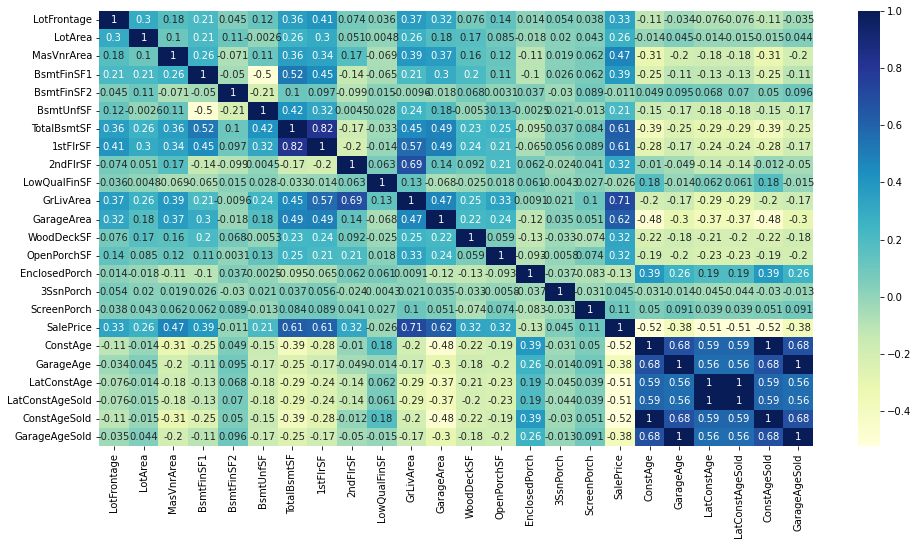

In [56]:
plt.figure(figsize=(16,8))
sns.heatmap(data_numeric.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### From the above heatmap we can say that:
There is high positive correlation of SalePrice with: TotBsmtSF, 1stFlrSF, GrLivArea, GarageArea

There is high negative correlation of SalePrice with: ConstAge, LatConstAge

It is also observed that ConstAge, GarageAge and LatConstAge have same correlation values with ConstAgeSold, GarageAgeSold and LatConstAgeSold respectively. Hence we can get rid of the last three

In [57]:
data[['ConstAge', 'ConstAgeSold', 'GarageAge', 'GarageAgeSold', 'LatConstAge', 'LatConstAgeSold']]

,ConstAge,ConstAgeSold,GarageAge,GarageAgeSold,LatConstAge,LatConstAgeSold
0,7,5,7,5,7,5
1,34,31,34,31,34,31
2,9,7,9,7,8,6
3,95,91,12,8,40,36
4,10,8,10,8,10,8
5,17,16,17,16,15,14
6,6,3,6,3,5,2
7,37,36,37,36,37,36
8,79,77,79,77,60,58
9,71,69,71,69,60,58


In [58]:
data = data.drop(['ConstAgeSold', 'GarageAgeSold', 'LatConstAgeSold'], axis=1)

In [59]:
data.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,ConstAge,GarageAge,LatConstAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.058904,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,180921.195890,38.732192,29.746575,25.134247
std,22.303731,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,79442.502883,30.202904,25.054953,20.645407
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,7.000000,6.000000
50%,68.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,25.500000,16.000000
75%,80.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,48.000000,43.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,755000.000000,138.000000,110.000000,60.000000


### Outlier Analysis

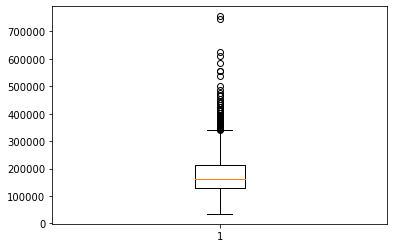

In [60]:
# from below it is clear that there are some outliers for SalePrice variable.
# removing all the rows that have more than 350000 SalePrice value
plt.boxplot(data.SalePrice)
plt.show()

In [61]:
data[data.SalePrice >= 350000].shape

(56, 73)

In [62]:
data = data[data.SalePrice <= 350000]

In [63]:
data.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,ConstAge,GarageAge,LatConstAge
count,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.00000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000
mean,69.345661,10162.550498,91.132290,420.604552,47.242532,558.904694,1026.751778,1134.247511,339.09175,5.662162,1479.001422,460.475818,90.118065,45.064011,22.420341,3.215505,14.561166,171111.937411,39.790185,30.571124,25.862731
std,21.825839,8306.491402,160.803701,431.217489,162.277286,429.095405,408.214050,358.365443,422.99089,47.176390,483.908357,205.319091,121.850951,65.725030,61.535816,28.492737,54.625260,60364.233852,30.000061,25.050275,20.642845
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.00000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,1.000000,0.000000,0.000000
25%,60.000000,7454.750000,0.000000,0.000000,0.000000,218.000000,788.250000,872.500000,0.00000,0.000000,1120.250000,312.750000,0.000000,0.000000,0.000000,0.000000,0.000000,129000.000000,11.000000,7.000000,7.000000
50%,68.000000,9338.500000,0.000000,371.000000,0.000000,474.000000,975.000000,1072.000000,0.00000,0.000000,1440.000000,472.000000,0.000000,22.500000,0.000000,0.000000,0.000000,159975.000000,38.000000,29.000000,18.000000
75%,80.000000,11329.000000,145.000000,689.000000,0.000000,806.000000,1255.250000,1350.000000,727.75000,0.000000,1732.750000,575.000000,167.500000,64.000000,0.000000,0.000000,0.000000,205000.000000,57.000000,48.000000,44.000000
max,313.000000,164660.000000,1600.000000,5644.000000,1474.000000,2042.000000,6110.000000,4692.000000,1818.00000,528.000000,5642.000000,1418.000000,736.000000,547.000000,552.000000,508.000000,480.000000,350000.000000,138.000000,110.000000,60.000000


In [64]:
# from description of numeric fields, it is observed that 25th, 50th and 75th percentiles of below columns are zero:
# BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch
# Will analyze these columns using box plots and also by counting rows with 0 values for these columns
# and based upon this analysis will take a call on whether to remove them or keep them

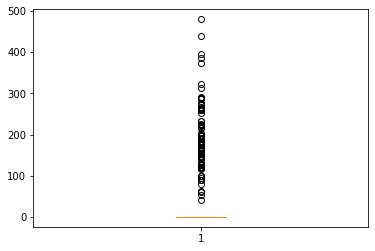

In [65]:
plt.boxplot(data.ScreenPorch)
plt.show()

In [66]:
data.ScreenPorch.value_counts().head(5)

0      1297
120       5
192       5
224       4
189       4
Name: ScreenPorch, dtype: int64

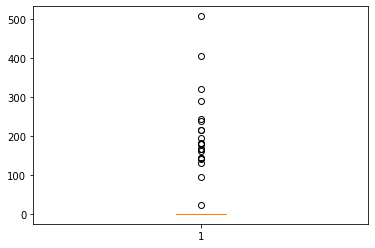

In [67]:
plt.boxplot(data['3SsnPorch'])
plt.show()

In [68]:
data['3SsnPorch'].value_counts().head(5)

0      1384
168       3
216       2
180       2
144       2
Name: 3SsnPorch, dtype: int64

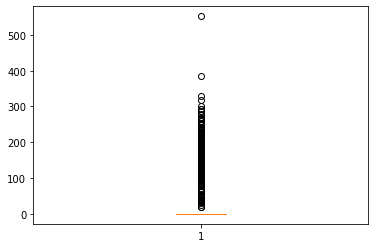

In [69]:
plt.boxplot(data.EnclosedPorch)
plt.show()

In [70]:
data.EnclosedPorch.value_counts().head(5)

0      1201
112      15
96        6
120       5
216       5
Name: EnclosedPorch, dtype: int64

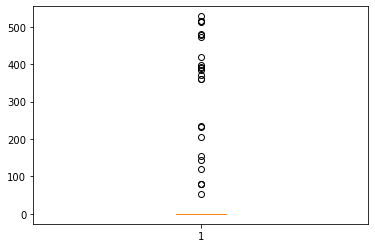

In [71]:
plt.boxplot(data.LowQualFinSF)
plt.show()

In [72]:
data.LowQualFinSF.value_counts().head(5)

0      1381
80        3
360       2
515       1
205       1
Name: LowQualFinSF, dtype: int64

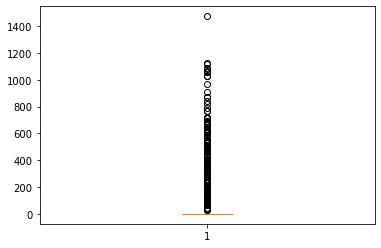

In [73]:
plt.boxplot(data.BsmtFinSF2)
plt.show()

In [74]:
data.BsmtFinSF2.value_counts().head(5)

0      1242
180       4
374       3
468       2
294       2
Name: BsmtFinSF2, dtype: int64

In [75]:
print("0 value rows in column ScreenPorch : " + 
      str(round(data[data.ScreenPorch == 0].shape[0] / data.shape[0] * 100, 2)) + "%")
print("0 value rows in column 3SsnPorch : " + 
      str(round(data[data['3SsnPorch'] == 0].shape[0] / data.shape[0] * 100, 2)) + "%")
print("0 value rows in column EnclosedPorch : " + 
      str(round(data[data.EnclosedPorch == 0].shape[0] / data.shape[0] * 100, 2)) + "%")
print("0 value rows in column LowQualFinSF : " + 
      str(round(data[data.LowQualFinSF == 0].shape[0] / data.shape[0] * 100, 2)) + "%")
print("0 value rows in column BsmtFinSF2 : " + 
      str(round(data[data.BsmtFinSF2 == 0].shape[0] / data.shape[0] * 100, 2)) + "%")

0 value rows in column ScreenPorch : 92.25%
0 value rows in column 3SsnPorch : 98.44%
0 value rows in column EnclosedPorch : 85.42%
0 value rows in column LowQualFinSF : 98.22%
0 value rows in column BsmtFinSF2 : 88.34%


In [76]:
# from above it is clear that, large number of rows in these columns are having 0 value. 
# Hence safely we can remove these columns

In [77]:
data = data.drop(['ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'LowQualFinSF', 'BsmtFinSF2'], axis=1)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1406 non-null   object
 1   MSZoning       1406 non-null   object
 2   LotFrontage    1406 non-null   int64 
 3   LotArea        1406 non-null   int64 
 4   Street         1406 non-null   object
 5   LotShape       1406 non-null   object
 6   LandContour    1406 non-null   object
 7   Utilities      1406 non-null   object
 8   LotConfig      1406 non-null   object
 9   LandSlope      1406 non-null   object
 10  Neighborhood   1406 non-null   object
 11  Condition1     1406 non-null   object
 12  Condition2     1406 non-null   object
 13  BldgType       1406 non-null   object
 14  HouseStyle     1406 non-null   object
 15  OverallQual    1406 non-null   object
 16  OverallCond    1406 non-null   object
 17  RoofStyle      1406 non-null   object
 18  RoofMatl       1406 non-null

In [79]:
data_numeric.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,ConstAge,GarageAge,LatConstAge,LatConstAgeSold,ConstAgeSold,GarageAgeSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.058904,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,180921.195890,38.732192,29.746575,25.134247,22.950000,36.547945,27.562329
std,22.303731,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,79442.502883,30.202904,25.054953,20.645407,20.640653,30.250152,25.087145
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-4.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,7.000000,6.000000,4.000000,8.000000,4.000000
50%,68.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,25.500000,16.000000,14.000000,35.000000,23.500000
75%,80.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,48.000000,43.000000,41.000000,54.000000,46.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,755000.000000,138.000000,110.000000,60.000000,60.000000,136.000000,107.000000


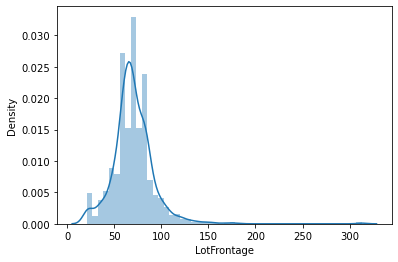

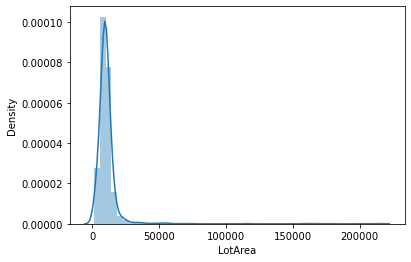

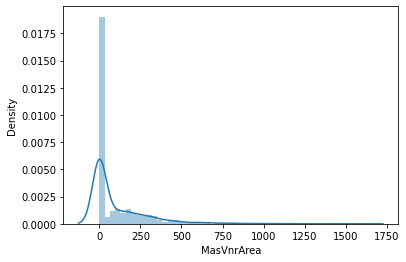

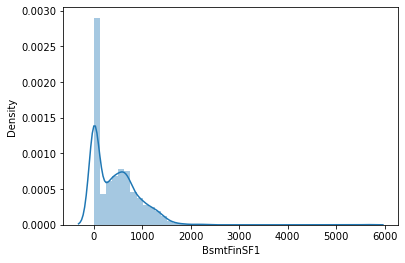

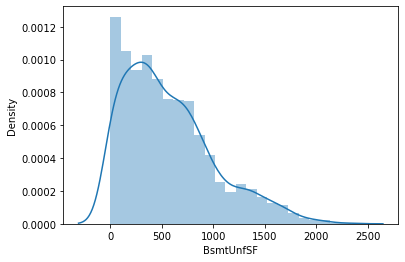

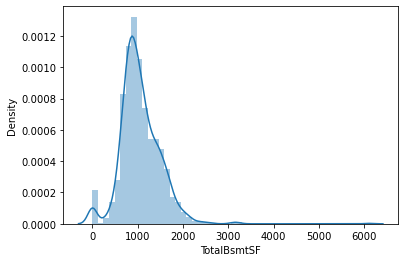

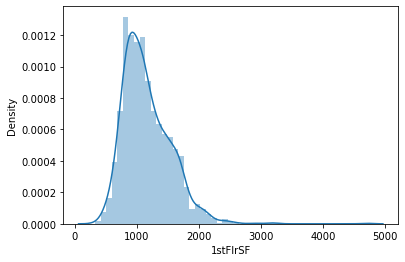

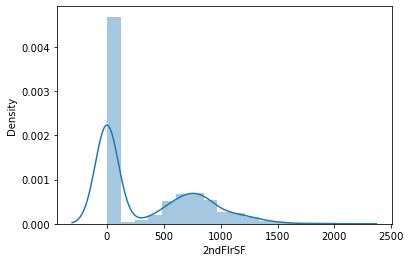

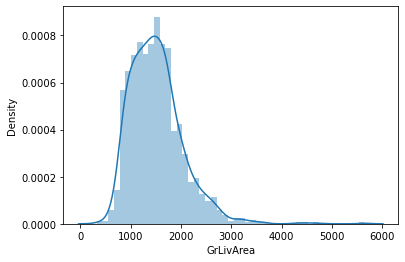

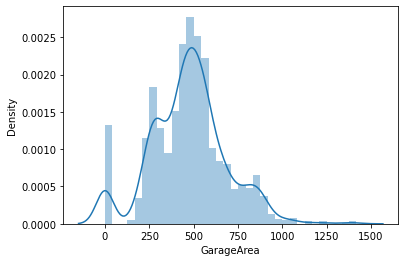

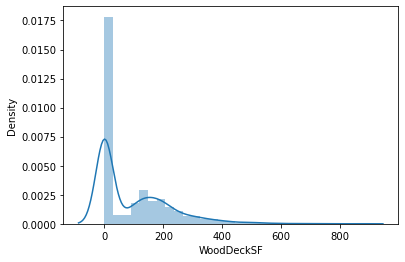

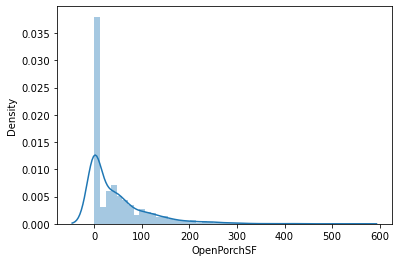

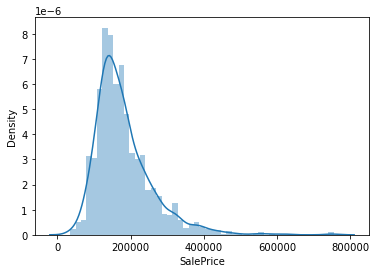

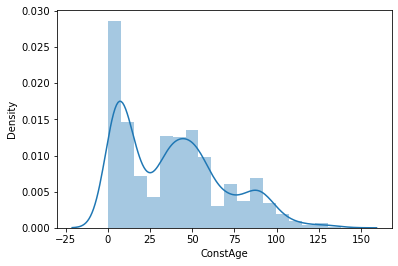

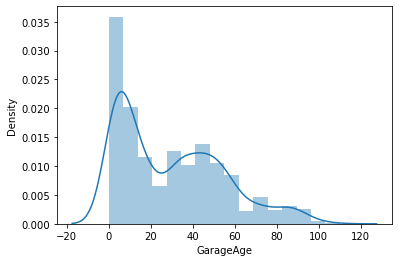

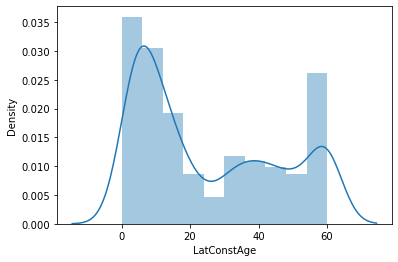

In [80]:
#data.select_dtypes(include=['float64', 'int64', 'int32'])
for i in data.select_dtypes(include=['int64']):
    plt.figure()
    sns.distplot(data_numeric[i])


In [81]:
data[data.MasVnrArea == 0].shape

(858, 68)

In [82]:
data[data.BsmtFinSF1 == 0].shape

(457, 68)

In [83]:
data[data['2ndFlrSF'] == 0].shape

(799, 68)

In [84]:
data[data['WoodDeckSF'] == 0].shape

(750, 68)

In [85]:
data[data['OpenPorchSF'] == 0].shape

(649, 68)

In [86]:
data.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,ConstAge,GarageAge,LatConstAge
count,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.00000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000
mean,69.345661,10162.550498,91.132290,420.604552,558.904694,1026.751778,1134.247511,339.09175,1479.001422,460.475818,90.118065,45.064011,171111.937411,39.790185,30.571124,25.862731
std,21.825839,8306.491402,160.803701,431.217489,429.095405,408.214050,358.365443,422.99089,483.908357,205.319091,121.850951,65.725030,60364.233852,30.000061,25.050275,20.642845
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.00000,334.000000,0.000000,0.000000,0.000000,34900.000000,1.000000,0.000000,0.000000
25%,60.000000,7454.750000,0.000000,0.000000,218.000000,788.250000,872.500000,0.00000,1120.250000,312.750000,0.000000,0.000000,129000.000000,11.000000,7.000000,7.000000
50%,68.000000,9338.500000,0.000000,371.000000,474.000000,975.000000,1072.000000,0.00000,1440.000000,472.000000,0.000000,22.500000,159975.000000,38.000000,29.000000,18.000000
75%,80.000000,11329.000000,145.000000,689.000000,806.000000,1255.250000,1350.000000,727.75000,1732.750000,575.000000,167.500000,64.000000,205000.000000,57.000000,48.000000,44.000000
max,313.000000,164660.000000,1600.000000,5644.000000,2042.000000,6110.000000,4692.000000,1818.00000,5642.000000,1418.000000,736.000000,547.000000,350000.000000,138.000000,110.000000,60.000000


In [87]:
data.shape

(1406, 68)

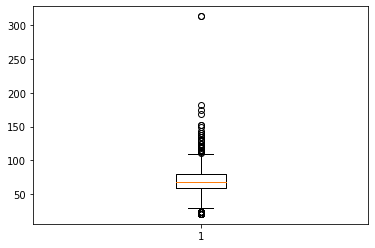

In [88]:
plt.boxplot(data.LotFrontage)
plt.show()

In [89]:
data[data.LotFrontage > 120].shape

(27, 68)

In [90]:
print("LotFontage column contains " + str(round(data[data.LotFrontage > 120].shape[0]/data.shape[0]*100,2)) + "% outliers")

LotFontage column contains 1.92% outliers


In [91]:
data = data[data.LotFrontage <= 120]

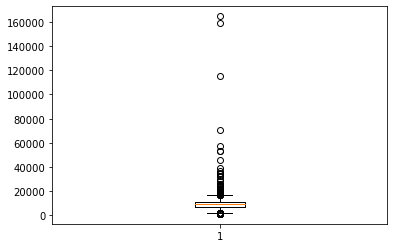

In [92]:
plt.boxplot(data.LotArea)
plt.show()

In [93]:
data[data.LotArea > 20000].shape

(37, 68)

In [94]:
print("LotArea column contains " + str(round(data[data.LotArea > 20000].shape[0]/data.shape[0]*100,2)) + "% outliers")

LotArea column contains 2.68% outliers


In [95]:
data = data[data.LotArea <= 20000]

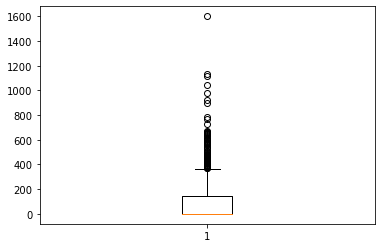

In [96]:
plt.boxplot(data.MasVnrArea)
plt.show()

In [97]:
data[data.MasVnrArea > 400].shape

(69, 68)

In [98]:
print("MasVnrArea column contains " + str(round(data[data.MasVnrArea > 400].shape[0]/data.shape[0]*100,2)) + "% outliers")

MasVnrArea column contains 5.14% outliers


In [99]:
#data = data[data.MasVnrArea <= 400]

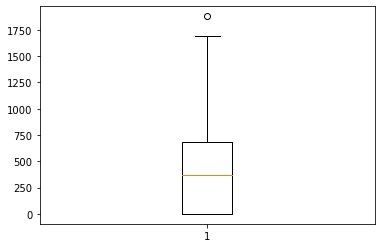

In [100]:
plt.boxplot(data.BsmtFinSF1)
plt.show()

In [101]:
data[data.BsmtFinSF1 > 1800].shape

(1, 68)

In [102]:
print("BsmtFinSF1 column contains " + str(round(data[data.BsmtFinSF1 > 1800].shape[0]/data.shape[0]*100,2)) + "% outliers")

BsmtFinSF1 column contains 0.07% outliers


In [103]:
data = data[data.BsmtFinSF1 <= 1800]

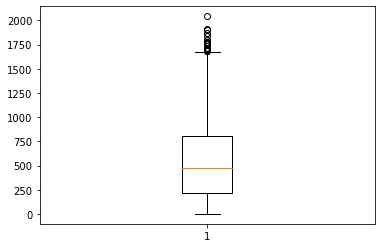

In [104]:
plt.boxplot(data.BsmtUnfSF)
plt.show()

In [105]:
data[data.BsmtUnfSF > 1700].shape

(14, 68)

In [106]:
print("BsmtUnfSF column contains " + str(round(data[data.BsmtUnfSF > 1700].shape[0]/data.shape[0]*100,2)) + "% outliers")

BsmtUnfSF column contains 1.04% outliers


In [107]:
data = data[data.BsmtUnfSF <= 1700]

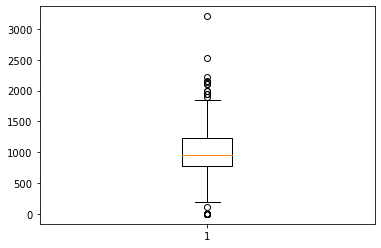

In [108]:
plt.boxplot(data.TotalBsmtSF)
plt.show()

In [109]:
data[data.TotalBsmtSF > 1900].shape

(12, 68)

In [110]:
print("TotalBsmtSF column contains " + str(round(data[data.TotalBsmtSF > 1700].shape[0]/data.shape[0]*100,2)) + "% outliers")

TotalBsmtSF column contains 2.86% outliers


In [111]:
#data = data[data.TotalBsmtSF <= 1900]

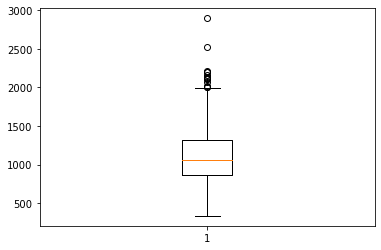

In [112]:
plt.boxplot(data['1stFlrSF'])
plt.show()

In [113]:
data[data['1stFlrSF'] > 1900].shape

(17, 68)

In [114]:
print("1stFlrSF column contains " + str(round(data[data['1stFlrSF'] > 1900].shape[0]/data.shape[0]*100,2)) + "% outliers")

1stFlrSF column contains 1.28% outliers


In [115]:
data = data[data['1stFlrSF'] <= 1900]

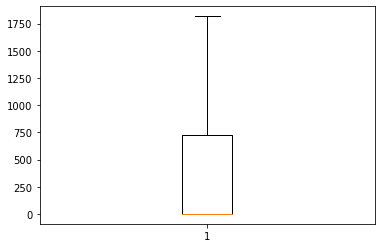

In [116]:
plt.boxplot(data['2ndFlrSF'])
plt.show()

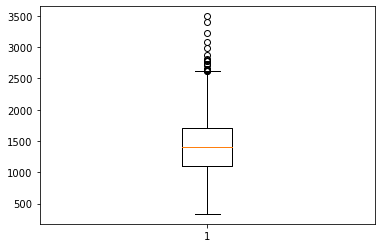

In [117]:
plt.boxplot(data['GrLivArea'])
plt.show()

In [118]:
data[data['GrLivArea'] > 2500].shape

(37, 68)

In [119]:
print("GrLivArea column contains " + str(round(data[data['GrLivArea'] > 2500].shape[0]/data.shape[0]*100,2)) + "% outliers")

GrLivArea column contains 2.82% outliers


In [120]:
#data = data[data['GrLivArea'] <= 2500]

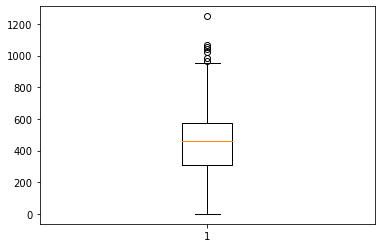

In [121]:
plt.boxplot(data.GarageArea)
plt.show()

In [122]:
data[data.GarageArea > 950].shape

(8, 68)

In [123]:
print("GarageArea column contains " + str(round(data[data['GarageArea'] > 950].shape[0]/data.shape[0]*100,2)) + "% outliers")

GarageArea column contains 0.61% outliers


In [124]:
data = data[data['GarageArea'] <= 950]

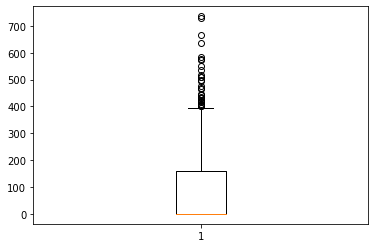

In [125]:
plt.boxplot(data.WoodDeckSF)
plt.show()

In [126]:
data[data.WoodDeckSF > 410].shape

(26, 68)

In [127]:
print("WoodDeckSF column contains " + str(round(data[data['WoodDeckSF'] > 410].shape[0]/data.shape[0]*100,2)) + "% outliers")

WoodDeckSF column contains 2.0% outliers


In [128]:
#data = data[data['WoodDeckSF'] <= 410]

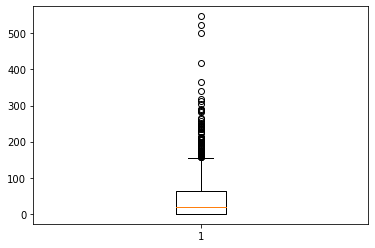

In [129]:
plt.boxplot(data.OpenPorchSF)
plt.show()

In [130]:
data[data.OpenPorchSF > 200].shape

(43, 68)

In [131]:
print("OpenPorchSF column contains " + str(round(data[data['OpenPorchSF'] > 200].shape[0]/data.shape[0]*100,2)) + "% outliers")

OpenPorchSF column contains 3.3% outliers


In [132]:
#data = data[data['OpenPorchSF'] <= 200]

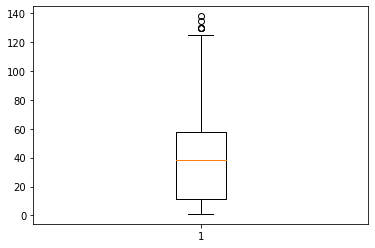

In [133]:
plt.boxplot(data.ConstAge)
plt.show()

In [134]:
data[data.ConstAge > 120].shape

(8, 68)

In [135]:
print("ConstAge column contains " + str(round(data[data['ConstAge'] > 120].shape[0]/data.shape[0]*100,2)) + "% outliers")

ConstAge column contains 0.61% outliers


In [136]:
data = data[data['ConstAge'] <= 120]

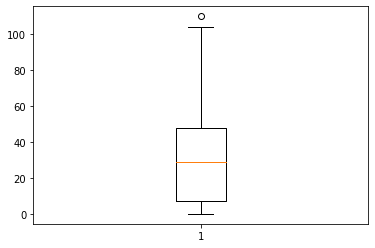

In [137]:
plt.boxplot(data.GarageAge)
plt.show()

In [138]:
data[data.GarageAge > 105].shape

(1, 68)

In [139]:
print("GarageAge column contains " + str(round(data[data['GarageAge'] > 105].shape[0]/data.shape[0]*100,2)) + "% outliers")

GarageAge column contains 0.08% outliers


In [140]:
data = data[data['GarageAge'] <= 105]

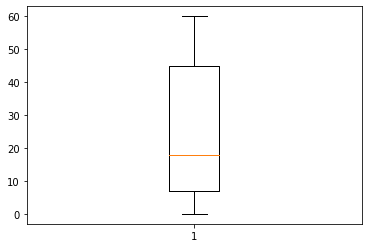

In [141]:
plt.boxplot(data.LatConstAge)
plt.show()

In [142]:
#print("LotFontage column contains " + str(round(data[data.LotFrontage > 120].shape[0]/data.shape[0]*100,2)) + "% outliers")
#print("LotArea column contains " + str(round(data[data.LotArea > 20000].shape[0]/data.shape[0]*100,2)) + "% outliers")
#print("MasVnrArea column contains " + str(round(data[data.MasVnrArea > 400].shape[0]/data.shape[0]*100,2)) + "% outliers")
#print("BsmtFinSF1 column contains " + str(round(data[data.BsmtFinSF1 > 1800].shape[0]/data.shape[0]*100,2)) + "% outliers")
#print("BsmtUnfSF column contains " + str(round(data[data.BsmtUnfSF > 1700].shape[0]/data.shape[0]*100,2)) + "% outliers")
#print("TotalBsmtSF column contains " + str(round(data[data.TotalBsmtSF > 1700].shape[0]/data.shape[0]*100,2)) + "% outliers")
#print("1stFlrSF column contains " + str(round(data[data['1stFlrSF'] > 1900].shape[0]/data.shape[0]*100,2)) + "% outliers")
#print("GrLivArea column contains " + str(round(data[data['GrLivArea'] > 2500].shape[0]/data.shape[0]*100,2)) + "% outliers")
#print("GarageArea column contains " + str(round(data[data['GarageArea'] > 950].shape[0]/data.shape[0]*100,2)) + "% outliers")
#print("WoodDeckSF column contains " + str(round(data[data['WoodDeckSF'] > 410].shape[0]/data.shape[0]*100,2)) + "% outliers")
#print("OpenPorchSF column contains " + str(round(data[data['OpenPorchSF'] > 200].shape[0]/data.shape[0]*100,2)) + "% outliers")
#print("ConstAge column contains " + str(round(data[data['ConstAge'] > 120].shape[0]/data.shape[0]*100,2)) + "% outliers")
#print("GarageAge column contains " + str(round(data[data['GarageAge'] > 105].shape[0]/data.shape[0]*100,2)) + "% outliers")

In [143]:
data.shape

(1293, 68)

In [144]:
#data = data[data.LotFrontage <= 120]
#data = data[data.LotArea <= 20000]
#data = data[data.MasVnrArea <= 400]
#data = data[data.BsmtFinSF1 <= 1800]
#data = data[data.BsmtUnfSF <= 1700]
#data = data[data.TotalBsmtSF <= 1900]
#data = data[data['1stFlrSF'] <= 1900]
#data = data[data['GrLivArea'] <= 2500]
#data = data[data['GarageArea'] <= 950]
#data = data[data['WoodDeckSF'] <= 410]
#data = data[data['OpenPorchSF'] <= 200]
#data = data[data['ConstAge'] <= 120]
#data = data[data['GarageAge'] <= 105]

In [145]:
#data.shape

In [146]:
(1406-1293)/1406

0.08036984352773827

In [147]:
#### Visualising Numeric Variables

#Let's make a pairplot of all the numeric variables

In [148]:
data_numeric = data.select_dtypes(include=['int64'])
data_cat = data.select_dtypes(include=['object'])

In [149]:
data_numeric.shape

(1293, 16)

In [150]:
data_cat.shape

(1293, 52)

<Figure size 432x288 with 0 Axes>

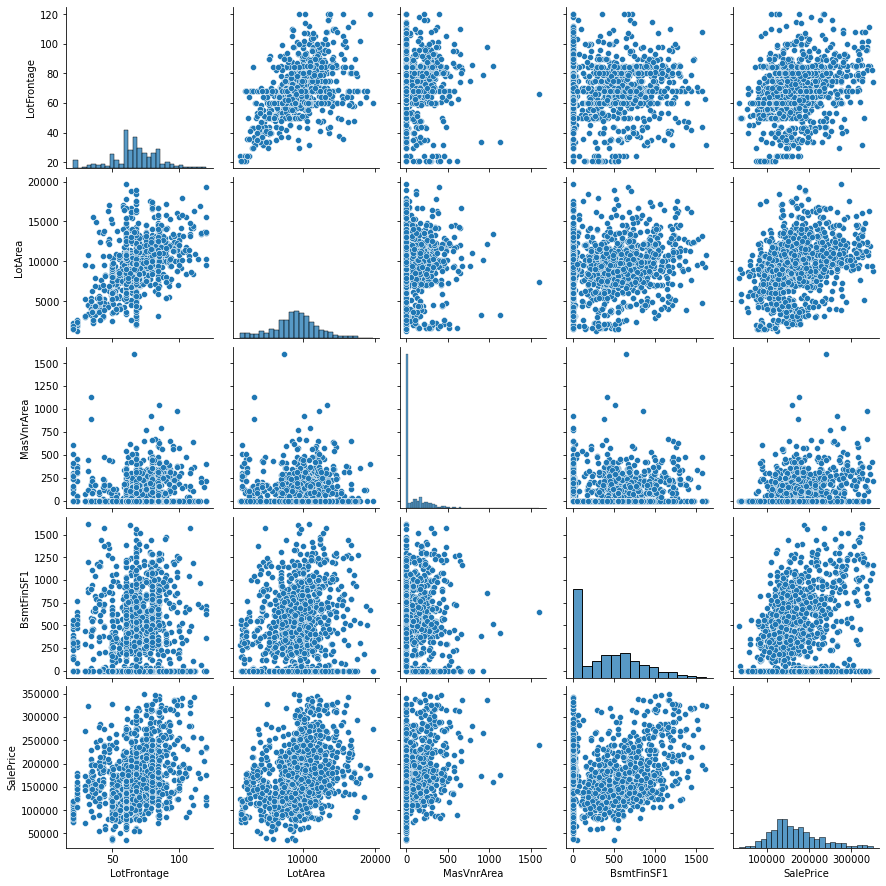

<Figure size 432x288 with 0 Axes>

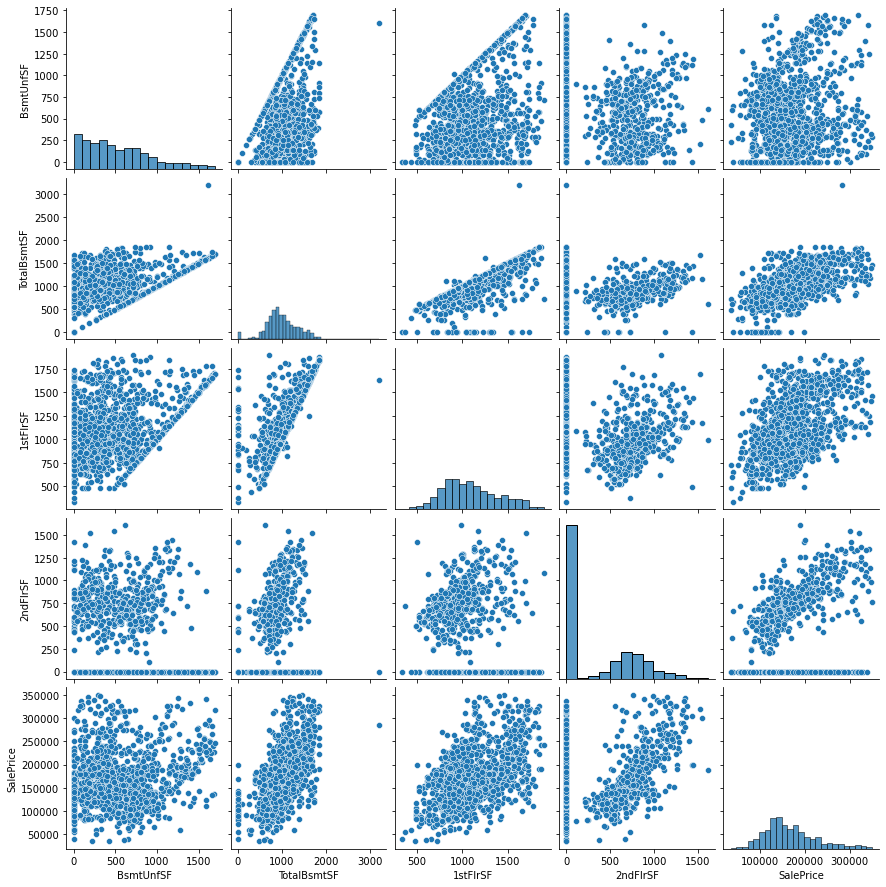

<Figure size 432x288 with 0 Axes>

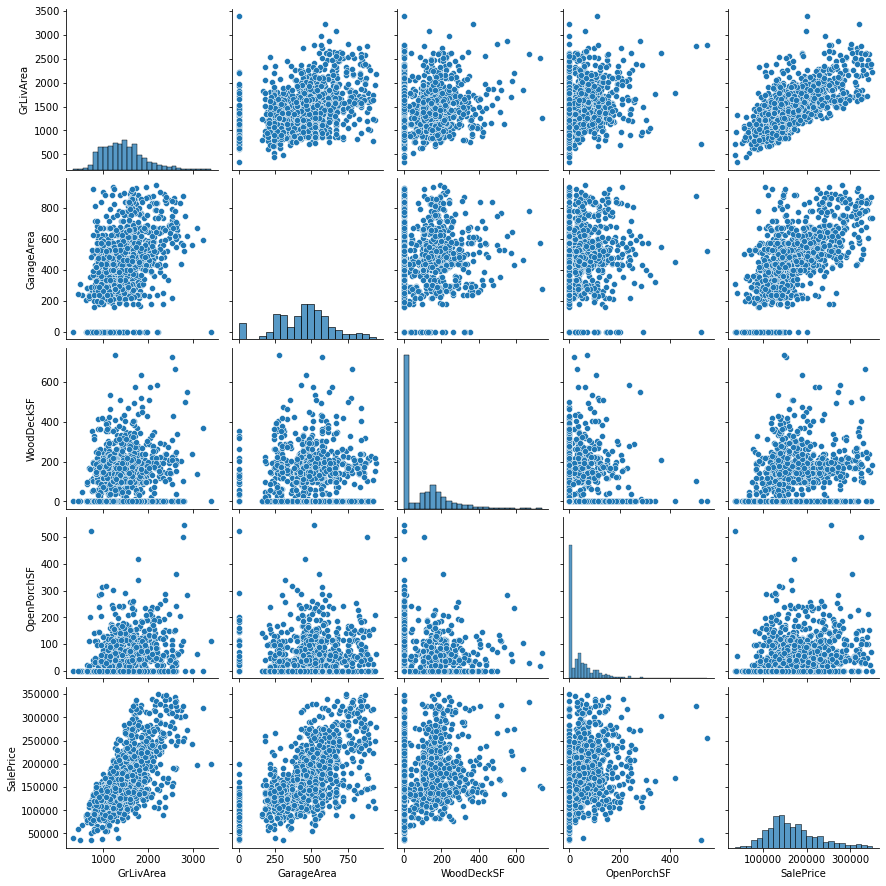

<Figure size 432x288 with 0 Axes>

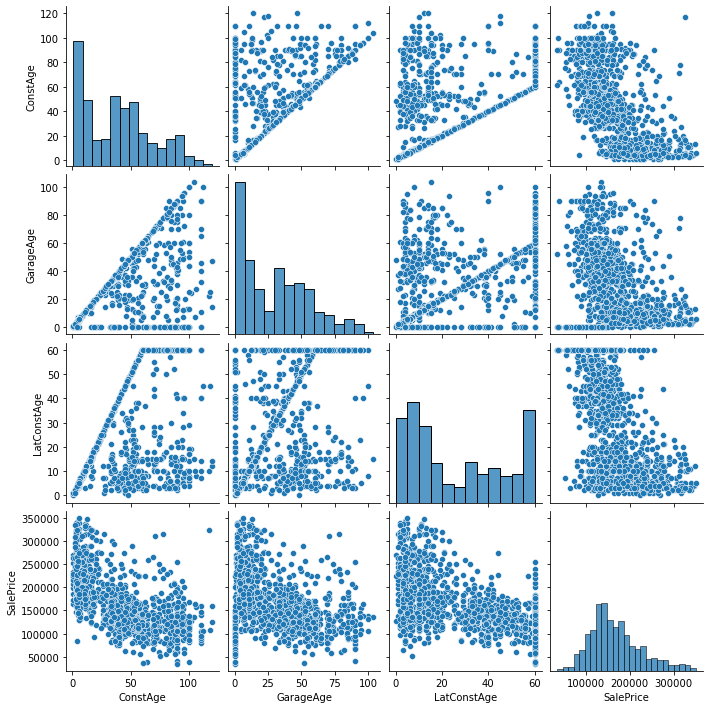

In [151]:

# since there are many numeric columns, pairplotting 5 at a time against SalePrice
# from these pairplots, we observe good number of columns showing linear relationship with SalePrice
target_column = data_numeric.SalePrice
predictor_num_columns = data_numeric.drop(['SalePrice'], axis=1)
predictor_num_columns.shape
for i in [0, 4, 8, 12]:
    #print(i)
    if i == 12:
        n_columns  = predictor_num_columns.iloc[: , range(i, i+3)]
    else:
        n_columns  = predictor_num_columns.iloc[: , range(i, i+4)]
    n_columns = pd.concat([n_columns, target_column], axis=1)
    #print(n_columns.columns)
    plt.figure()
    sns.pairplot(n_columns)
    plt.show()


In [152]:
data_cat.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,RFn,2,TA,TA,Y,2,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,5,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,9,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,2,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,12,WD,Normal


In [153]:
data_cat.shape

(1293, 52)

In [154]:
# Finding the categorical columns where single category has more than 90% of the overall frequncy
# for such columns, other categories do not hold significant frequency rows
# in other words, data is biased towards this highly frequent category and other items become insignificant
# hence we can decide to remove such columns
data_cat_single_frequent = []
for i in data.select_dtypes(include=['object']).columns:
    #print(i)
    #print(data[i].value_counts())
    if data[i].value_counts().max()/data.shape[0]*100 > 90:
        print("For column " + i 
              + ", Highest frequency item is: " 
              + str(data[i].value_counts().idxmax())
              + " and its frequncy is: "
              + str(round(data[i].value_counts().max()/data.shape[0]*100, 2)))
        data_cat_single_frequent.append(i)

For column Street, Highest frequency item is: Pave and its frequncy is: 99.77
For column LandContour, Highest frequency item is: Lvl and its frequncy is: 91.8
For column Utilities, Highest frequency item is: AllPub and its frequncy is: 99.92
For column LandSlope, Highest frequency item is: Gtl and its frequncy is: 96.13
For column Condition2, Highest frequency item is: Norm and its frequncy is: 98.99
For column RoofMatl, Highest frequency item is: CompShg and its frequncy is: 99.15
For column Heating, Highest frequency item is: GasA and its frequncy is: 98.07
For column CentralAir, Highest frequency item is: Y and its frequncy is: 93.43
For column Electrical, Highest frequency item is: SBrkr and its frequncy is: 90.72
For column BsmtHalfBath, Highest frequency item is: 0 and its frequncy is: 94.35
For column KitchenAbvGr, Highest frequency item is: 1 and its frequncy is: 95.44
For column Functional, Highest frequency item is: Typ and its frequncy is: 93.27
For column GarageCond, Highes

In [155]:
# below columns have single category with more than 80% frequency. later removing such columns from dataset 

In [156]:
data_cat_single_frequent

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageCond',
 'PavedDrive']

In [157]:
data = data.drop(data_cat_single_frequent, axis=1)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1293 non-null   object
 1   MSZoning       1293 non-null   object
 2   LotFrontage    1293 non-null   int64 
 3   LotArea        1293 non-null   int64 
 4   LotShape       1293 non-null   object
 5   LotConfig      1293 non-null   object
 6   Neighborhood   1293 non-null   object
 7   Condition1     1293 non-null   object
 8   BldgType       1293 non-null   object
 9   HouseStyle     1293 non-null   object
 10  OverallQual    1293 non-null   object
 11  OverallCond    1293 non-null   object
 12  RoofStyle      1293 non-null   object
 13  Exterior1st    1293 non-null   object
 14  Exterior2nd    1293 non-null   object
 15  MasVnrType     1293 non-null   object
 16  MasVnrArea     1293 non-null   int64 
 17  ExterQual      1293 non-null   object
 18  ExterCond      1293 non-null

In [159]:
data_numeric = data.select_dtypes(include=['int64'])
data_cat = data.select_dtypes(include=['object'])

In [160]:
data_cat.shape

(1293, 38)

In [161]:
data_cat_with_SalePrice = pd.concat([data_cat, data.SalePrice], axis=1)
data_cat_with_SalePrice.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,1,2,1,3,Gd,8,0,NA,Attchd,RFn,2,TA,2,WD,Normal,208500
1,20,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,TA,5,WD,Normal,181500
2,60,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,TA,9,WD,Normal,223500
3,70,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,TA,2,WD,Abnorml,140000
4,60,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,TA,12,WD,Normal,250000


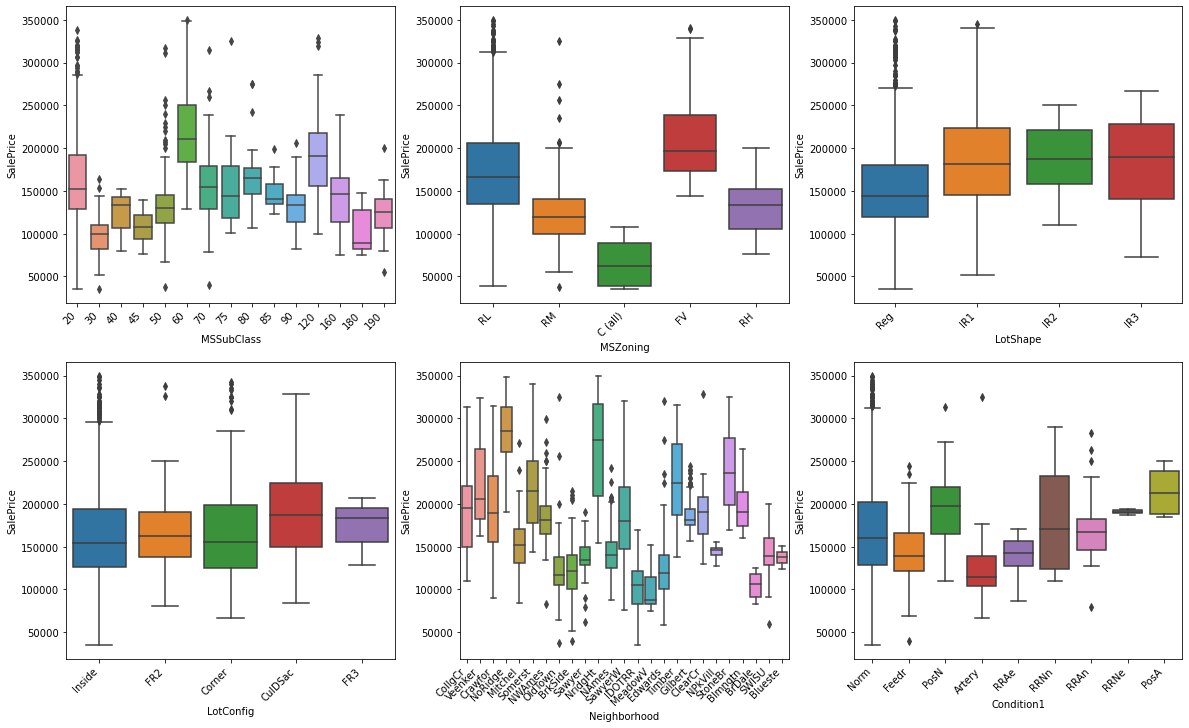

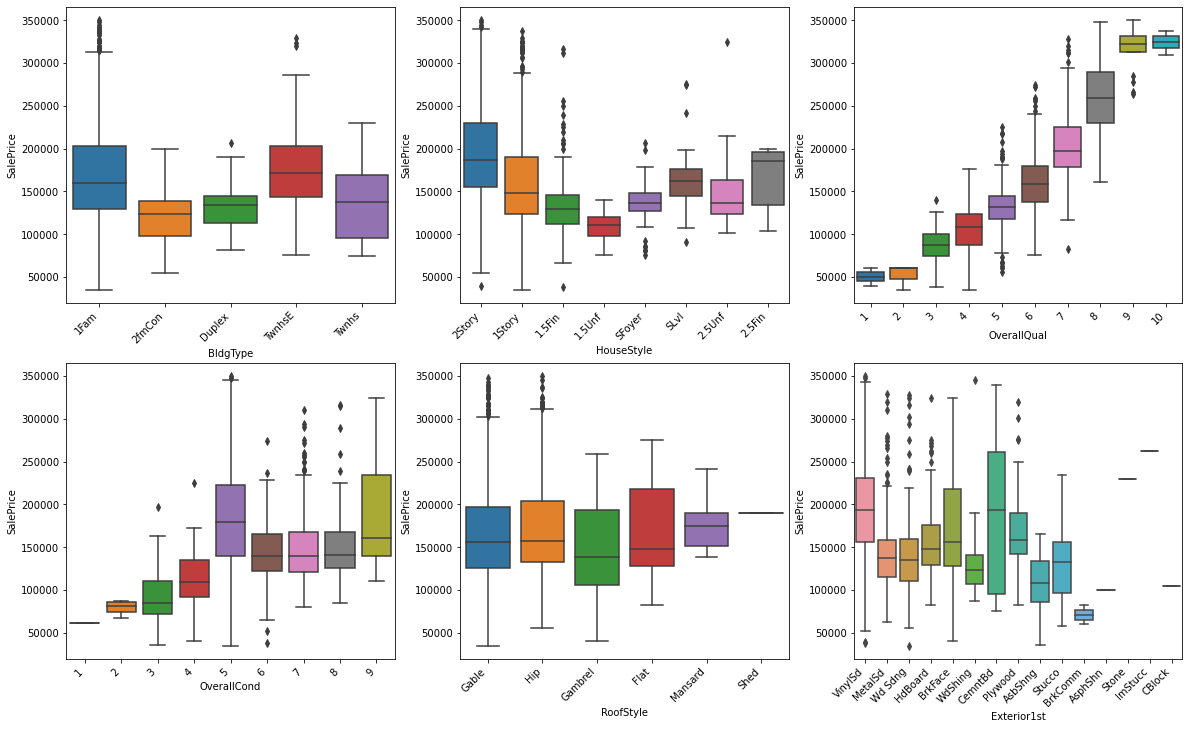

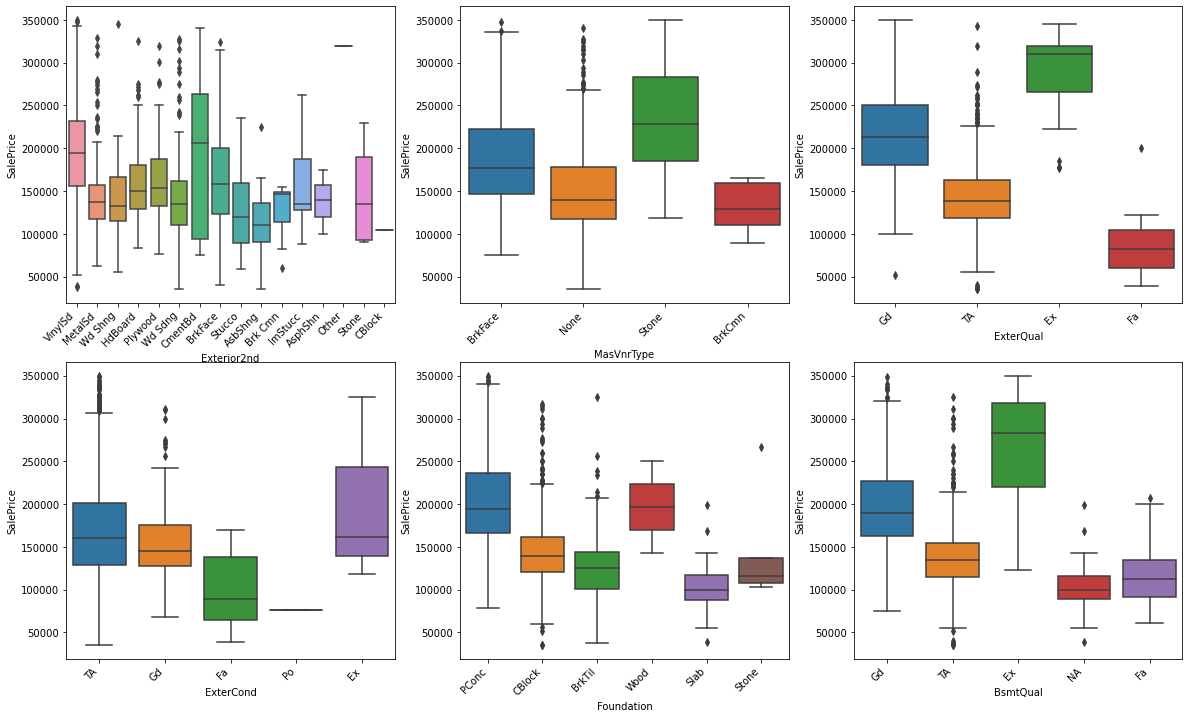

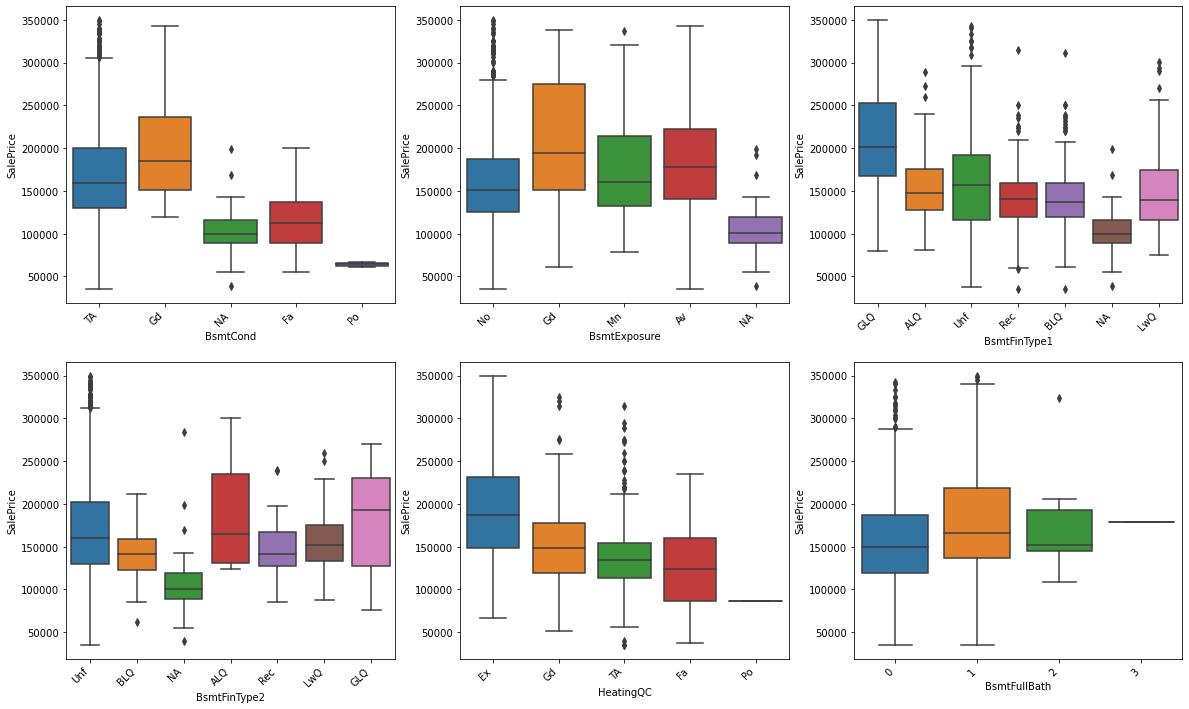

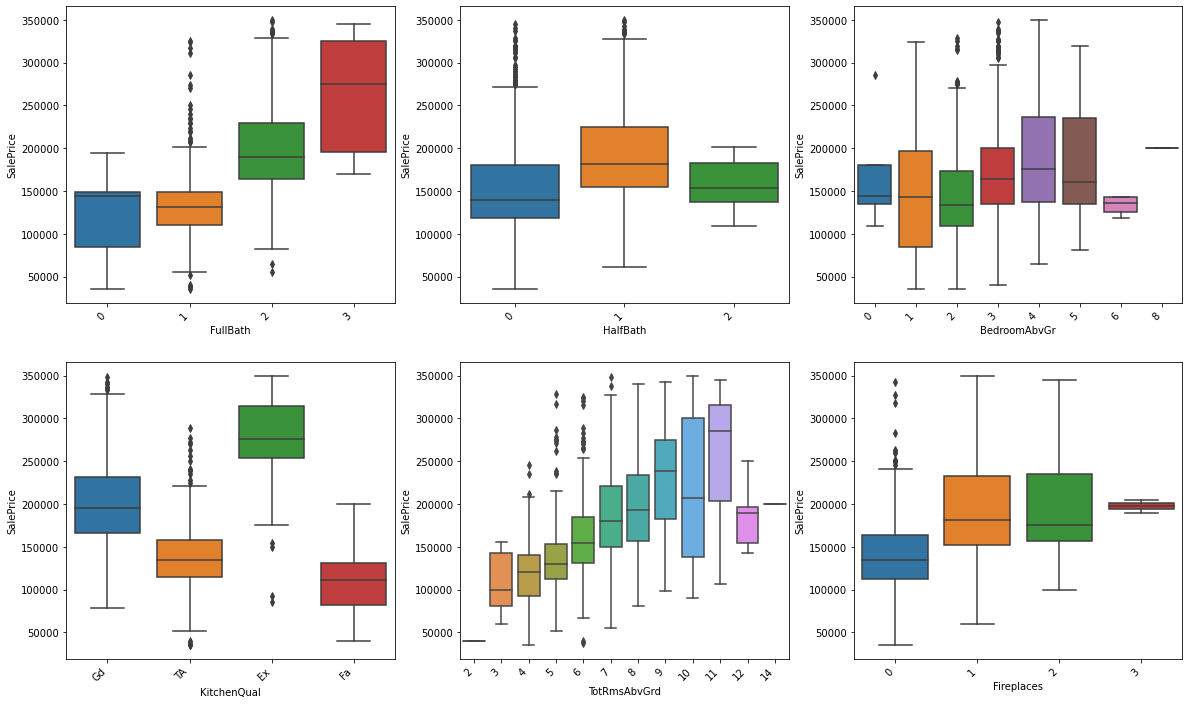

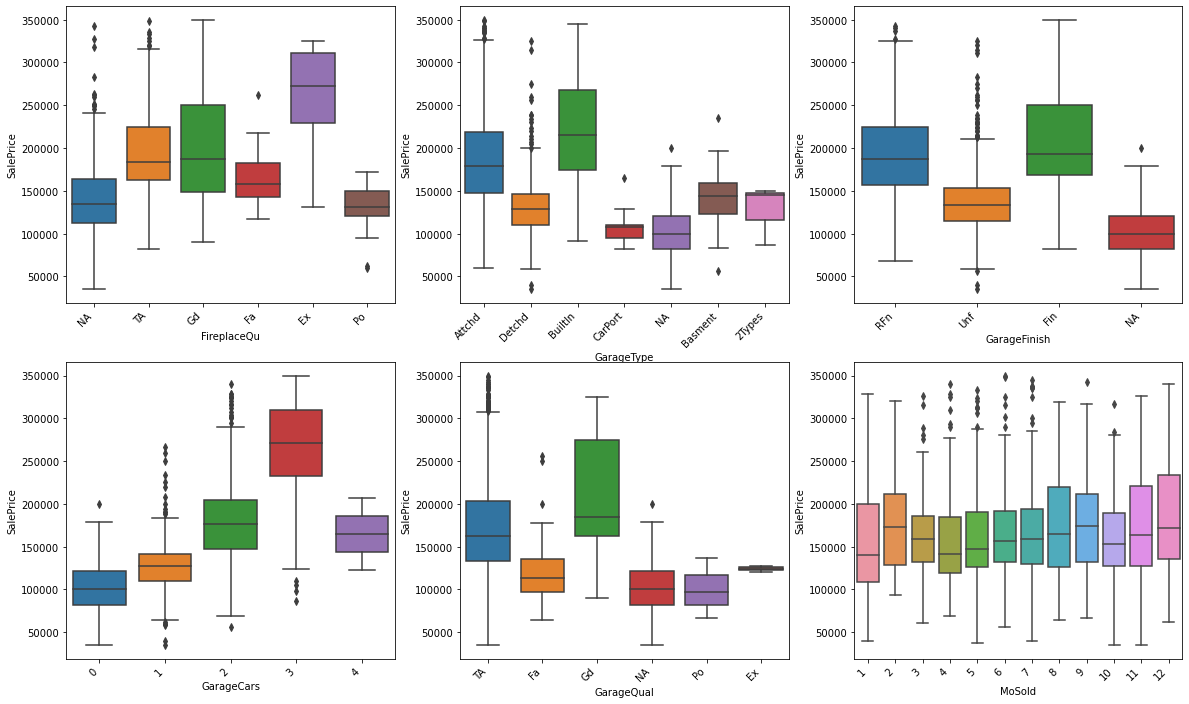

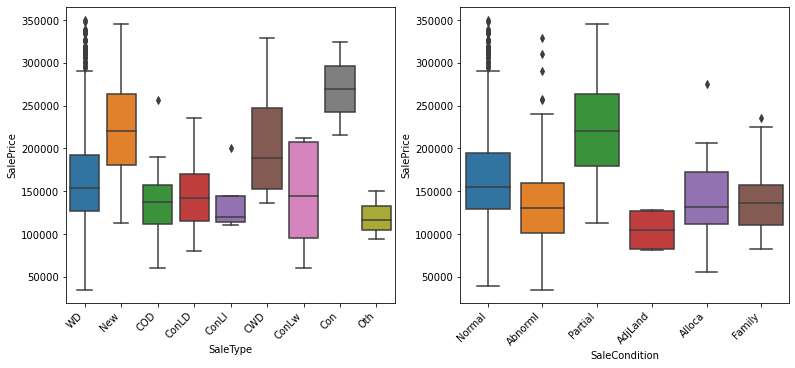

In [162]:
# since there are many categorical columns, plotting boxplot of 6 at a time against SalePrice
for i in [0, 6, 12, 18, 24, 30, 36]:
    plt.figure(figsize=(20, 12))
    plt.subplot(2,3,1)
    sns.boxplot(x = data_cat_with_SalePrice.columns[i], y = 'SalePrice', data = data_cat_with_SalePrice)
    plt.xticks(rotation=45,ha="right")
    plt.subplot(2,3,2)
    sns.boxplot(x = data_cat_with_SalePrice.columns[i+1], y = 'SalePrice', data = data_cat_with_SalePrice)
    plt.xticks(rotation=45,ha="right")
    if i == 36:
        break
    plt.subplot(2,3,3)
    sns.boxplot(x = data_cat_with_SalePrice.columns[i+2], y = 'SalePrice', data = data_cat_with_SalePrice)
    plt.xticks(rotation=45,ha="right")
    plt.subplot(2,3,4)
    sns.boxplot(x = data_cat_with_SalePrice.columns[i+3], y = 'SalePrice', data = data_cat_with_SalePrice)
    plt.xticks(rotation=45,ha="right")
    plt.subplot(2,3,5)
    sns.boxplot(x = data_cat_with_SalePrice.columns[i+4], y = 'SalePrice', data = data_cat_with_SalePrice)
    plt.xticks(rotation=45,ha="right")
    plt.subplot(2,3,6)
    sns.boxplot(x = data_cat_with_SalePrice.columns[i+5], y = 'SalePrice', data = data_cat_with_SalePrice)
    plt.xticks(rotation=45,ha="right")
    plt.show()
    i = i + 6

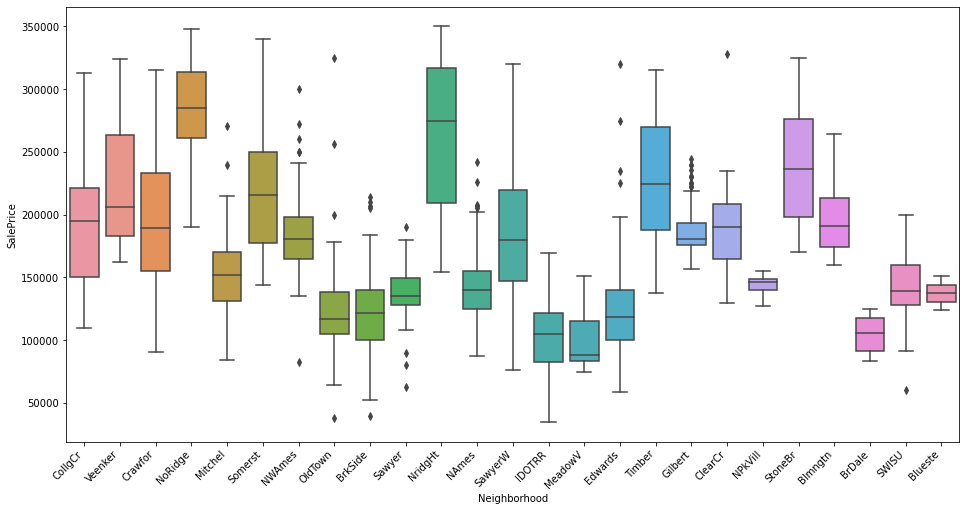

In [163]:
# plotting boxplot of neighborhood again as it was not clear in above image
plt.figure(figsize=(16,8))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = data_cat_with_SalePrice)
plt.xticks(rotation=45,ha="right")
plt.show()

In [164]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,MoSold,SaleType,SaleCondition,SalePrice,ConstAge,GarageAge,LatConstAge
0,60,RL,65,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,NA,Attchd,RFn,2,548,TA,0,61,2,WD,Normal,208500,7,7,7
1,20,RL,80,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,TA,298,0,5,WD,Normal,181500,34,34,34
2,60,RL,68,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,TA,0,42,9,WD,Normal,223500,9,9,8
3,70,RL,60,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,TA,0,35,2,WD,Abnorml,140000,95,12,40
4,60,RL,84,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,TA,192,84,12,WD,Normal,250000,10,10,10


### Dummy Variables

In [165]:
# I am creating two dataframes of categorical column data, one containing columns that have 'NA' as one of the categories and
# other containing columns that do not have 'NA' as one of the categories
cols_wi_NA_category = pd.DataFrame()
cols_wo_NA_category = pd.DataFrame()
for i in data_cat.columns:
    if 'NA' in data_cat[i].unique():
        cols_wi_NA_category = pd.concat([cols_wi_NA_category, data_cat[i]], axis=1)
    else:
        cols_wo_NA_category = pd.concat([cols_wo_NA_category, data_cat[i]], axis=1)

In [166]:
cols_wo_NA_category.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,SaleType,SaleCondition
0,60,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,1,2,1,3,Gd,8,0,2,2,WD,Normal
1,20,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Ex,0,2,0,3,TA,6,1,2,5,WD,Normal
2,60,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,1,2,1,3,Gd,6,1,2,9,WD,Normal
3,70,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,Gd,1,1,0,3,Gd,7,1,3,2,WD,Abnorml
4,60,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Ex,1,2,1,4,Gd,9,1,3,12,WD,Normal


In [167]:
# creating dummy variables of the columns that do not have NA as one of the categories
data_wo_NA_dummies = pd.get_dummies(cols_wo_NA_category, drop_first=True)

In [168]:
data_wo_NA_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

In [169]:
# as mentioned above, these are the columns that do have 'NA' as one of the category
cols_wi_NA_category.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual
0,Gd,TA,No,GLQ,Unf,NA,Attchd,RFn,TA
1,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA
2,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA
3,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA
4,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA


In [170]:
# creating dummy variables of the columns that do have NA as one of the categories
# so while creating dummy variables and dropping a column, instead of dropping first column I will be purposly dropping 
# a column that is created with NA category. As NA anyways does not give any information about that category column. 

# Hence keeping all the meaningful categorical dummy variables make sense and hence removing categorical dummy variable 
# which is created for NA category

#cols_wi_NA_category['BsmtQual'].str.get_dummies().add_prefix(i+"_").drop(i + '_NA', axis=1)
data_wi_NA_dummies = pd.DataFrame()
for i in cols_wi_NA_category.columns:
    data_wi_NA_dummies = pd.concat([data_wi_NA_dummies, cols_wi_NA_category[i].str.get_dummies().add_prefix(i+"_").drop(i+'_NA', axis=1)], axis=1)

In [171]:
data_wi_NA_dummies.head()

,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [172]:
data_wo_NA_dummies.shape

(1293, 198)

In [173]:
data_wi_NA_dummies.shape

(1293, 43)

In [174]:
data.shape

(1293, 54)

In [175]:
# dropping all the categorical variables for which dummy variables have been created
data = data.drop(data_cat.columns, axis=1)

In [176]:
data.shape

(1293, 16)

In [177]:
# creating a final data concatenating numerical variables and dummy variables
#data = pd.concat([data, data_wo_NA_dummies, data_wi_NA_dummies], axis=1)
model_data = pd.concat([data, data_wo_NA_dummies, data_wi_NA_dummies], axis=1)

In [178]:
model_data.shape

(1293, 257)

In [179]:
model_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,ConstAge,GarageAge,LatConstAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,6

In [180]:
SalePrice_Column = model_data.pop('SalePrice')

In [181]:
model_data.insert(0, 'SalePrice', SalePrice_Column)

In [182]:
model_data.head()

,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,ConstAge,GarageAge,LatConstAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,2

In [183]:
model_data.shape

(1293, 257)

In [184]:
model_data.to_csv('model_data.csv')

In [185]:
read_model_data = pd.read_csv('model_data.csv', index_col=0)

In [186]:
read_model_data.shape

(1293, 257)

In [187]:
read_model_data.head()

,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,ConstAge,GarageAge,LatConstAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,2